In [1]:
# Importing required Libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.ion()

# Chargement des données

In [2]:
train = pd.read_csv('archive/train.csv', index_col=0)
test = pd.read_csv('archive/test.csv', index_col=0)
train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
print(train.columns)
print(train.shape)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
(103904, 24)


In [4]:
## On retire la colonne "id" qui ne nous servira à rien
train.drop(labels=["id"], axis=1, inplace=True)
test.drop(labels=["id"], axis=1, inplace=True)

In [5]:
## Vérification
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
## Liste l'ensemble des colonnes avec le type des données et le nombre de valeurs non-nulles de chaque colonne
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [7]:
## Affiche les statistiques des variables (moyenne, quantiles, ...)
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<ul>
    <li>Au sein de notre jeu de données, nous remarquons que la plupart des colonnes sont catégoriques, seules quatre colonnes peuvent prendre n'importe quelles valeurs : "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes".</li>
    <li>Nous pouvons également remarquer qu'il nous manque des données au sein de la colonne "Arrival in Delay Minutes" (qui contient 103 594 valeurs non nulles tandis que le reste des colonnes en ont 103 904). Nous allons donc les retirer.</li>
    <li>Les statistiques de la variable "Departure Delay in Minutes" semblent démontrer que cette variable possède un grand nombre de valeurs aberrantes :
        <br>- Les quartiles démontrent que la majorité des valeurs de cette variable est concentrée autour de 0 min et une petite majorité autour de 13 min.
        <br>- La moyenne n'est que de 15 min tandis que la valeur maximale est de 1 592 min.
        <br>La variable "Arrival Delay in Minutes", étant corrélée à la variable "Departure Delay in Minutes", semblent également affecter par cette observation.
    </li>
    <li>Cette compagnie aérienne semble parcourir des distances de autour de 1000km.</li>
</ul>

In [8]:
## On retire les valeurs nulles
train.dropna(subset=["Arrival Delay in Minutes"], inplace=True)
test.dropna(subset=["Arrival Delay in Minutes"], inplace=True)
train.shape

(103594, 23)

# Exploration des données

Comme le temps de retard au décollage peut sembler être une variable intéressante dans la satisfaction d'un individu, nous allons donc en explorer les données :

### Exploration de "Departure Delay in Minutes" :

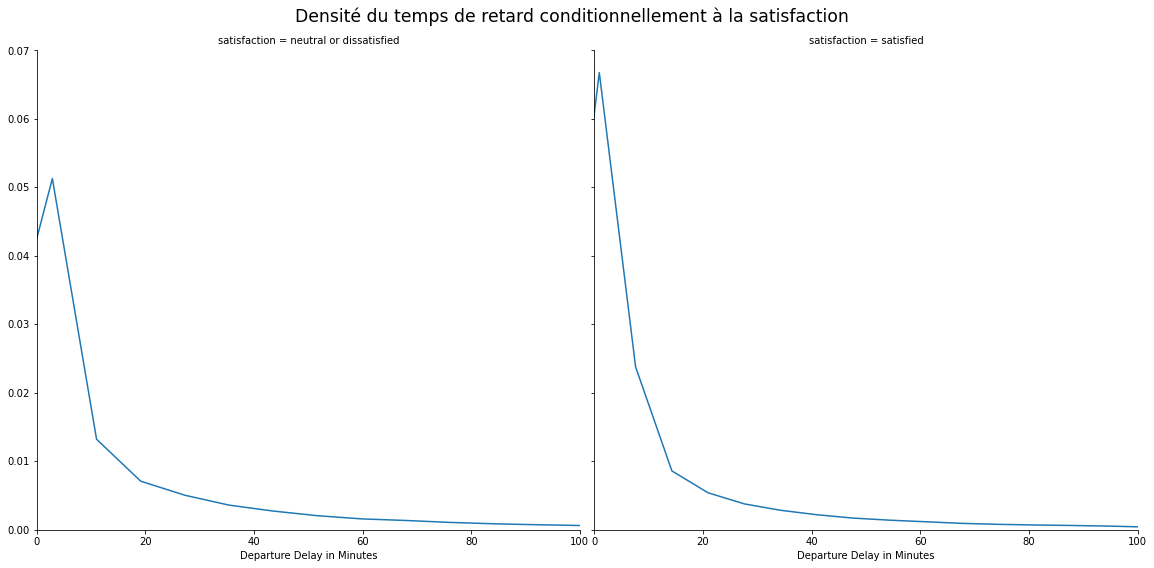

In [9]:
#On ne regardera pas les valeurs abérantes pour une meilleure lisibilité
g = sns.FacetGrid(data=train, col="satisfaction", height = 8)
plt.suptitle("Densité du temps de retard conditionnellement à la satisfaction", fontsize='xx-large')
g.map(sns.kdeplot, "Departure Delay in Minutes")
plt.xlim(0,100)
plt.show()

#### Remarques :
<ul>
    <li>Une personne qui sera satisfaite de son vol sera plus souvent associée à un temps de retard au décollage proche de 0min qu'une personne insatisfaite.</li>
    <li>Curieusement, une personne qui est satisfaite peut être associée à un temps de retard supérieur à 40min. De façon prévisible, un individu insatisfait peut également être associé à ce même temps.</li>
    <li>On observe les mêmes profils de distribution, ce qui laisserait supposer que le temps de départ n'a pas tant d'influence que cela dans l'analyse.</li>
</ul> 

**Regardons à présent le nombre d'individus par minute de retard au décollage et le pourcentage de satisfaction sachant le temps de retard :**

In [10]:
total = []
x=[]
train2 = train
max_min = train2["Departure Delay in Minutes"].max()

In [11]:
## On récupère, pour chaque minute de retard au décollage, le nombre d'individus interrogés
for i in range(max_min):
    x.append(i) ## remplissage de l'axe des abscisses
    nb=sum(train2["Departure Delay in Minutes"]==i) ## nombre d'individus interrogés ayant noté i comme délai de retard au décollage
    total.append(nb)

(0.0, 100.0)

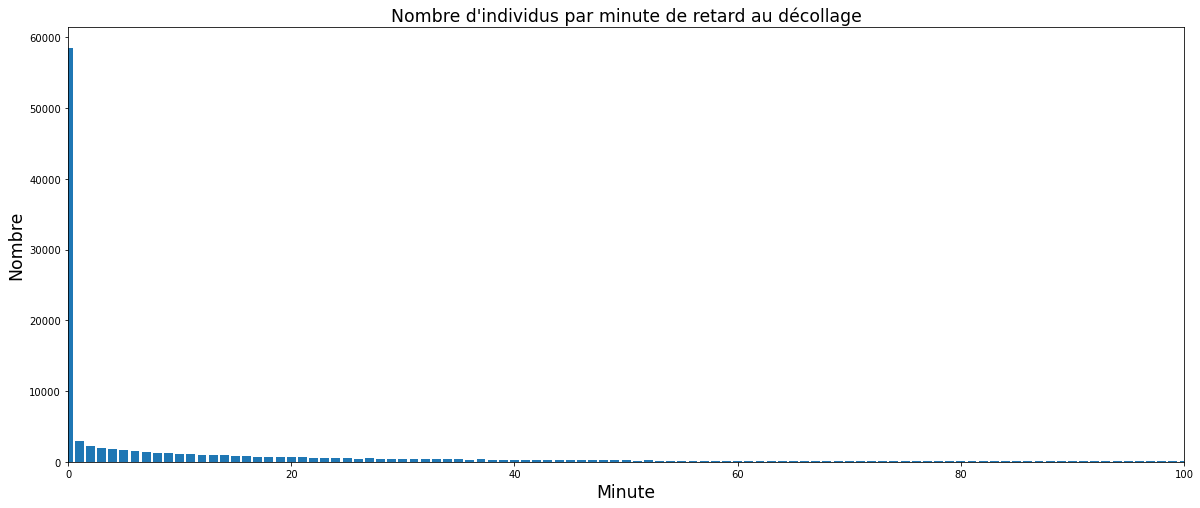

In [12]:
## Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, total)
plt.title("Nombre d'individus par minute de retard au décollage", fontsize='xx-large')
plt.xlabel("Minute",fontsize='xx-large')
plt.ylabel("Nombre",fontsize='xx-large')
plt.xlim(0,100)

(0.0, 700.0)

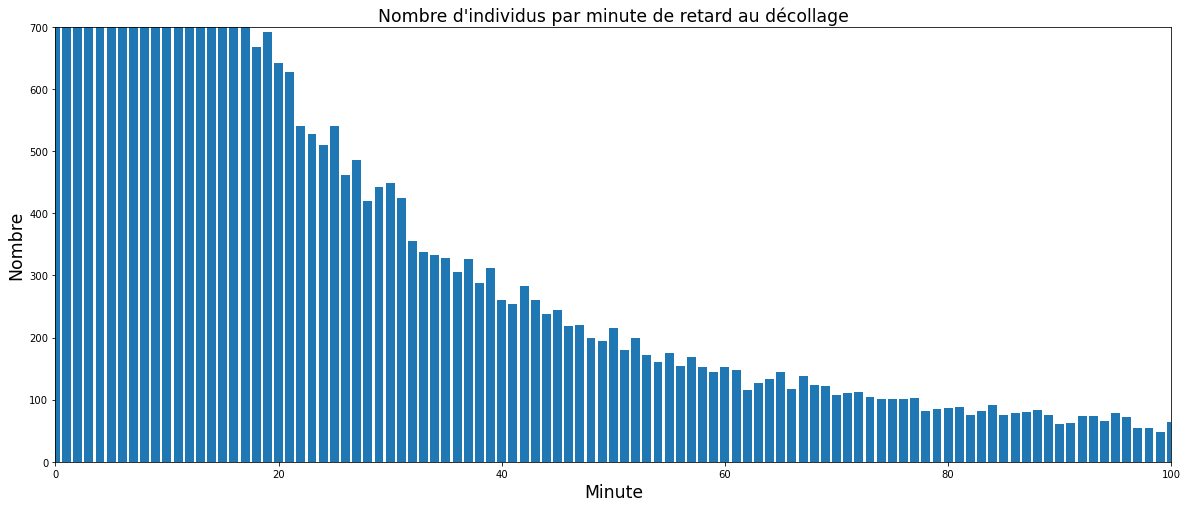

In [13]:
#Meme graphe mais un peu plus zoomé
plt.subplots(figsize=(20,8))
plt.bar(x, total)
plt.title("Nombre d'individus par minute de retard au décollage", fontsize='xx-large')
plt.xlabel("Minute",fontsize='xx-large')
plt.ylabel("Nombre",fontsize='xx-large')
plt.xlim(0,100)
plt.ylim(0,700)

<ul>
    <li>La quantité d'individus est supérieure à 80 entre 0min et 100min, ce qui sera suffisant pour estimer les probabilités conditionnelles de façon fiable.</li>
    <li>Par contre, après 100min, nous ne disposons pas d'assez d'individus pour que les estimations associées soient fiables.</li>
</ul>

In [14]:
percentage = []
x=[]
train2 = train
max_min = train2["Departure Delay in Minutes"].max()

In [15]:
## On récupère le pourcentage de satisfaction sachant le temps de retard au décollage
for i in range(max_min):
    x.append(i) ## remplissage de l'axe des abscisses
    nbc=sum((train2["Departure Delay in Minutes"]==i)&(train2["satisfaction"]=="satisfied")) ## nombre d'individus satisfaits ayant noté i comme délai de retard au décollage
    nb=sum(train2["Departure Delay in Minutes"]==i) ## nombre d'individus interrogés ayant noté i comme délai de retard au décollage
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) ## On calcule le pourcentage

(0.0, 100.0)

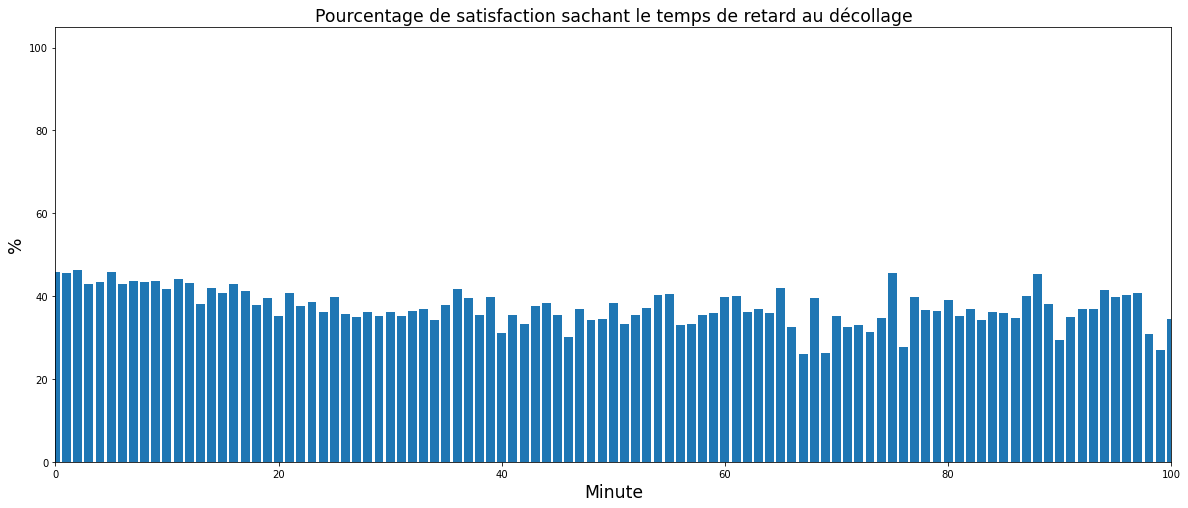

In [16]:
## Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title("Pourcentage de satisfaction sachant le temps de retard au décollage", fontsize='xx-large')
plt.xlabel("Minute",fontsize='xx-large')
plt.ylabel("%",fontsize='xx-large')
plt.xlim(0,100)

<ul>
    <li>Un individu ayant attendu un nombre de minutes entre 0 et 40min sera assez pareillement enclin à être satisfait de son vol.</li>
    <li>La probabilité de satisfaction d'un individu sachant le temps de retard au décollage est très légèrement décroissante entre 0 et 40min où elle varie entre 45% et 40%.</li>
    <li>Après 40min, il est difficile de procéder à une analyse en raison des fluctuations. Elles sont dues à un manque d'individus ayant attendu un nombre de minutes données.</li>
    <li>On peut remarquer que la moyenne de ces probabilités a l'air de tourner autour de 40%.</li>
    <li>Ces observations conforte l'idée que la variable de retard au décollage ne joue pas un rôle prépondérant dans l'évaluation de la satisfaction.</li>
</ul>

**Regardons le pourcentage d'individus satisfaits selon leurs âges :**

In [17]:
percentage = []
x=[]
train2 = train
max_min = train2["Age"].max()

In [18]:
## On récupère le pourcentage de satisfaction sachant l'âge d'un individu
for i in range(max_min):
    x.append(i) ## remplissage de l'axe des abscisses
    
    nbc=sum((train2["Age"]==i)&(train2["satisfaction"]=="satisfied")) ## nombre d'individus satisfaits étant âgés de i ans
    nb=sum(train2["Age"]==i) ## nombre d'individus interrogés étant âgés de i ans
    
    if(nb==0):
        percentage.append(0)
    else:
        percentage.append(nbc/nb*100) ## On calcule le pourcentage

Text(0.5, 0, 'Âge')

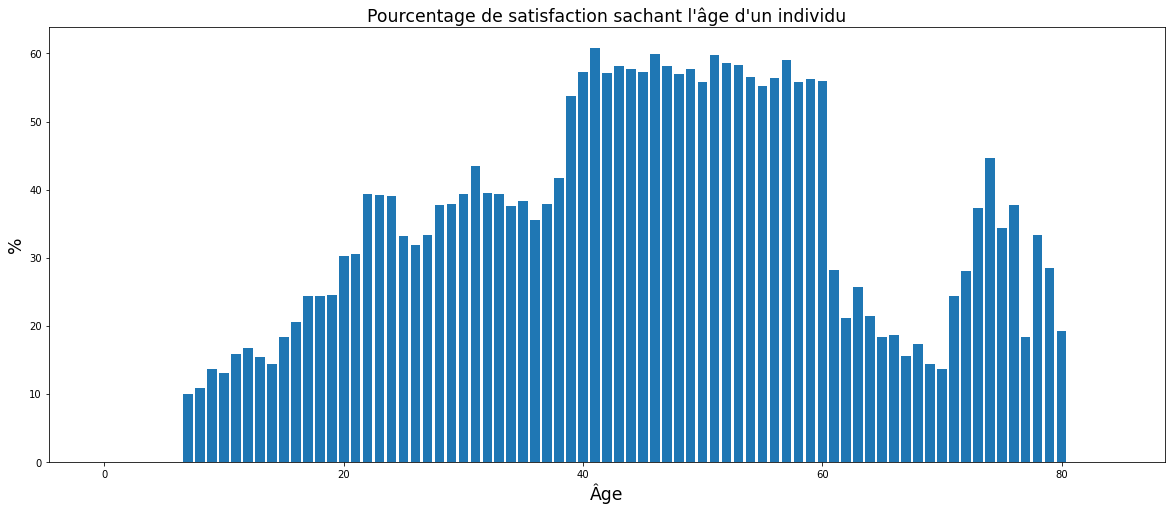

In [19]:
## Affichage du graphe
plt.subplots(figsize=(20,8))
plt.bar(x, percentage)
plt.title('Pourcentage de satisfaction sachant l\'âge d\'un individu', fontsize='xx-large')
plt.ylabel('%', fontsize='xx-large')
plt.xlabel('Âge', fontsize='xx-large')

<ul>
    <li>La tranche d'individus satisfaits se trouve entre 40 et 60 ans. La probabilité y est constante et vaut près de 60%.</li>
    <li>De façon générale, les jeunes n'apprécient pas du tout leur vol, mais cela s'améliore avec l'âge tant que celui-ci reste plus petit que 40 ans.</li>
    <li>Le phénomène inverse se produit après 60 ans.</li>
</ul>

**Regardons la densité de vol conditionnellement à la satisfaction :**

<Figure size 432x288 with 0 Axes>

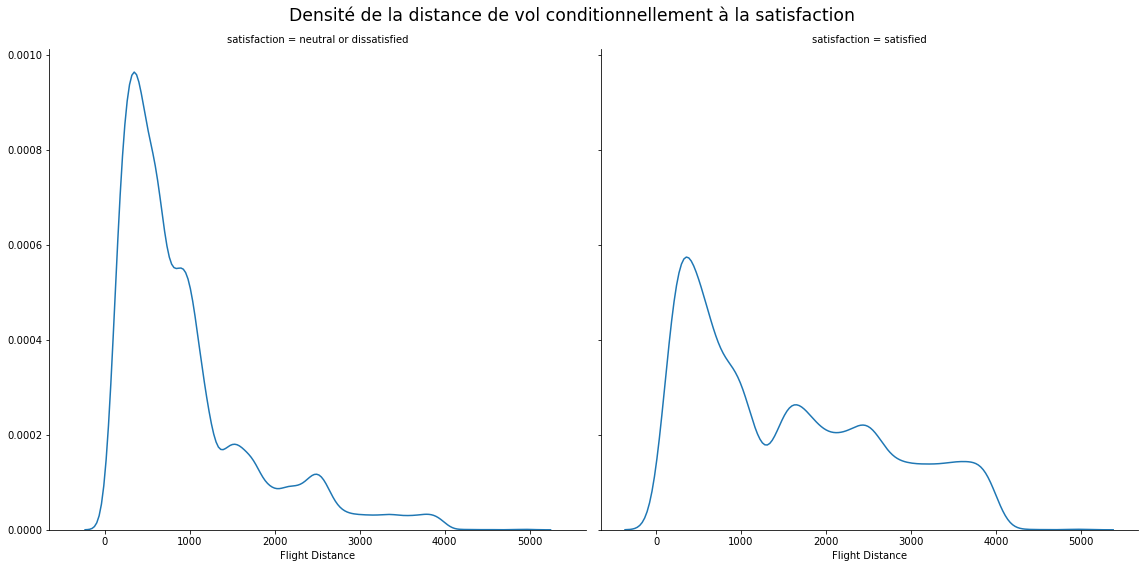

In [20]:
## Affichage du graphe
plt.clf()
g = sns.FacetGrid(data=train, col="satisfaction", height = 8)
plt.suptitle("Densité de la distance de vol conditionnellement à la satisfaction", fontsize='xx-large')
g.map(sns.kdeplot, "Flight Distance")
plt.show()

<ul>
    <li>Les individus non satisfaits de leur vol ont plus de chance d'avoir effectué des vols de distance proches de 800km.</li>
    <li>Cela reste dans une moindre mesure vraie des individus satisfaits, même si la distribution dans ce cas-ci est plus étalée.</li>
<ul>

**Regardons les données catégoriques, nous allons effectuer la corrélation après :**

In [21]:
train2 = train
categories = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
colonnes = [{'Female', 'Male'}, {'Loyal Customer', 'disloyal Customer'}, {'Personal Travel', 'Business travel'}, {'Business', 'Eco', 'Eco Plus'}]
rows=0
cols=0
count=0
i=0

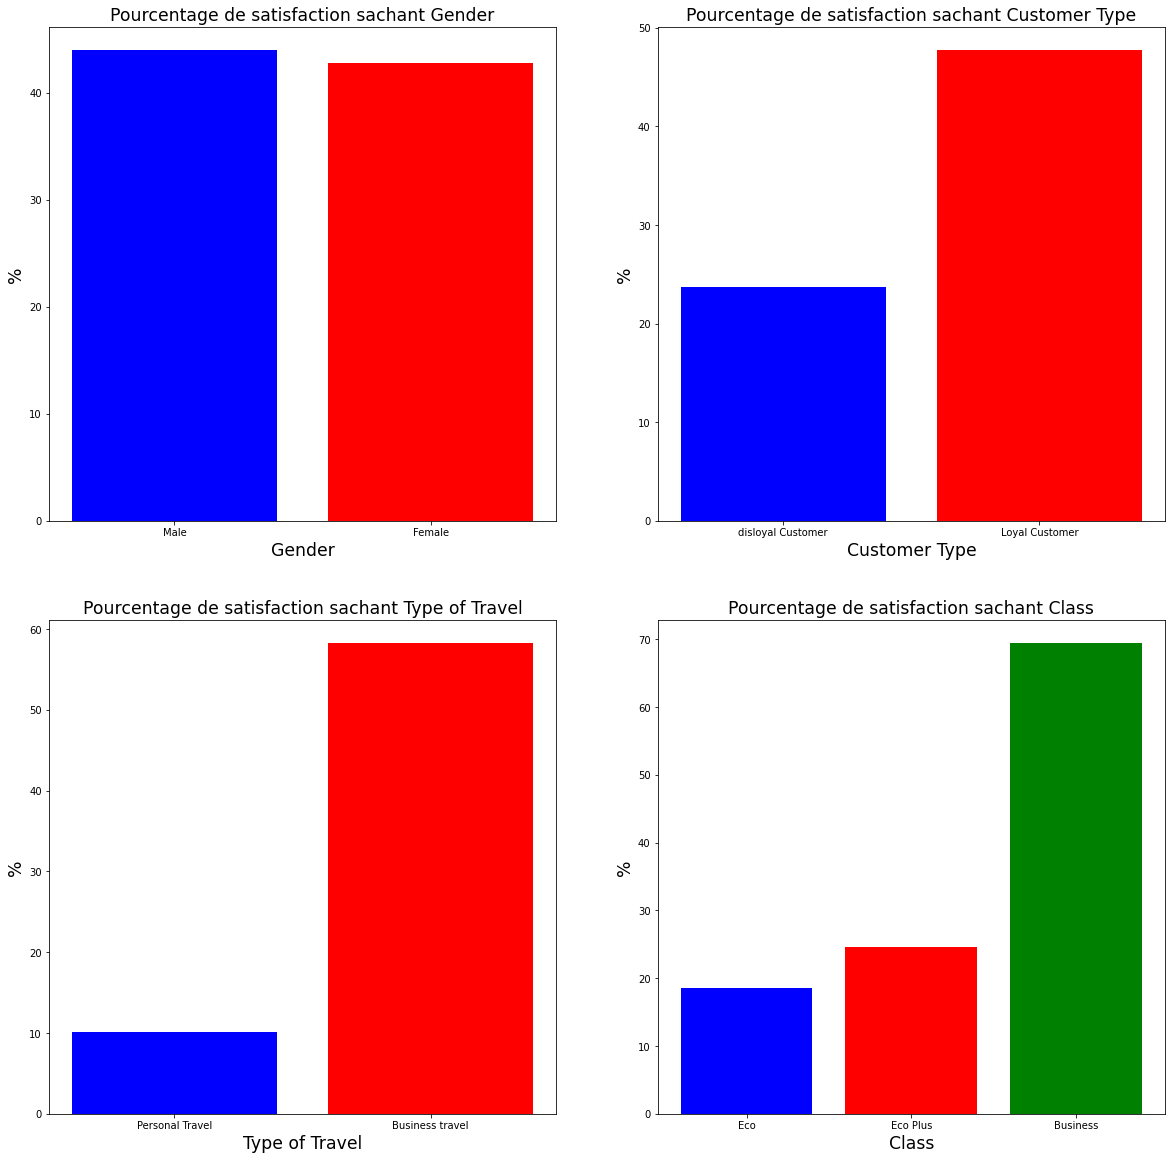

In [22]:
plt.figure(figsize=(20, 20))

## On récupère les pourcentages de satisfaction sachant chaque variable
for col in categories:
    x=[]
    percentage = []
    count+=1
    
    for c in colonnes[i]:
        x.append(c)
        
        nbc=sum((train2[col]==c)&(train2["satisfaction"]=="satisfied"))
        nb=sum(train2[col]==c)
        
        if(nb==0):
            percentage.append(0)
        else:
            percentage.append(nbc/nb*100)
    
    title='Pourcentage de satisfaction sachant ' + col
    
    plt.subplot(2, 2, count)
    plt.bar(x, percentage, color=['b', 'r', 'g'])
    plt.title(title, fontsize='xx-large')
    plt.ylabel('%', fontsize='xx-large')
    plt.xlabel(col, fontsize='xx-large')
    
    i+=1
    cols+=1
    if cols==2:
        cols=0
        rows+=1

<ul>
    <li>Un habitué de la ligne de vol ("Loyal Customer") a 2 fois plus satisfait qu'un client infidèle.</li>
    <li>Un individu ayant effectué un voyage pour raison personnelle a 6 fois moins de chance d'être satisfait qu'un individu ayant effectué un voyage d'affaire. Cela suggère que le vol convient bien mieux aux individus qui effectuent des voyages d'affaire.</li>
    <li>On observe également que la classe affaire garantie presque la satisfaction d'un individu (~70%). Il n'y a pas de différences trop notables entre les classes Eco et Eco Plus.</li>
    <li>Il n'y a pas de différence notables entre genres pour la satisfaction.</li>
</ul>

In [23]:
categories = [col for col in train.columns]
categories.remove("Gender")
categories.remove("Customer Type")
categories.remove("Type of Travel")
categories.remove("Class")
categories.remove("Age")
categories.remove("Departure Delay in Minutes")
categories.remove("Arrival Delay in Minutes")
categories.remove("Flight Distance")
categories.remove("satisfaction")

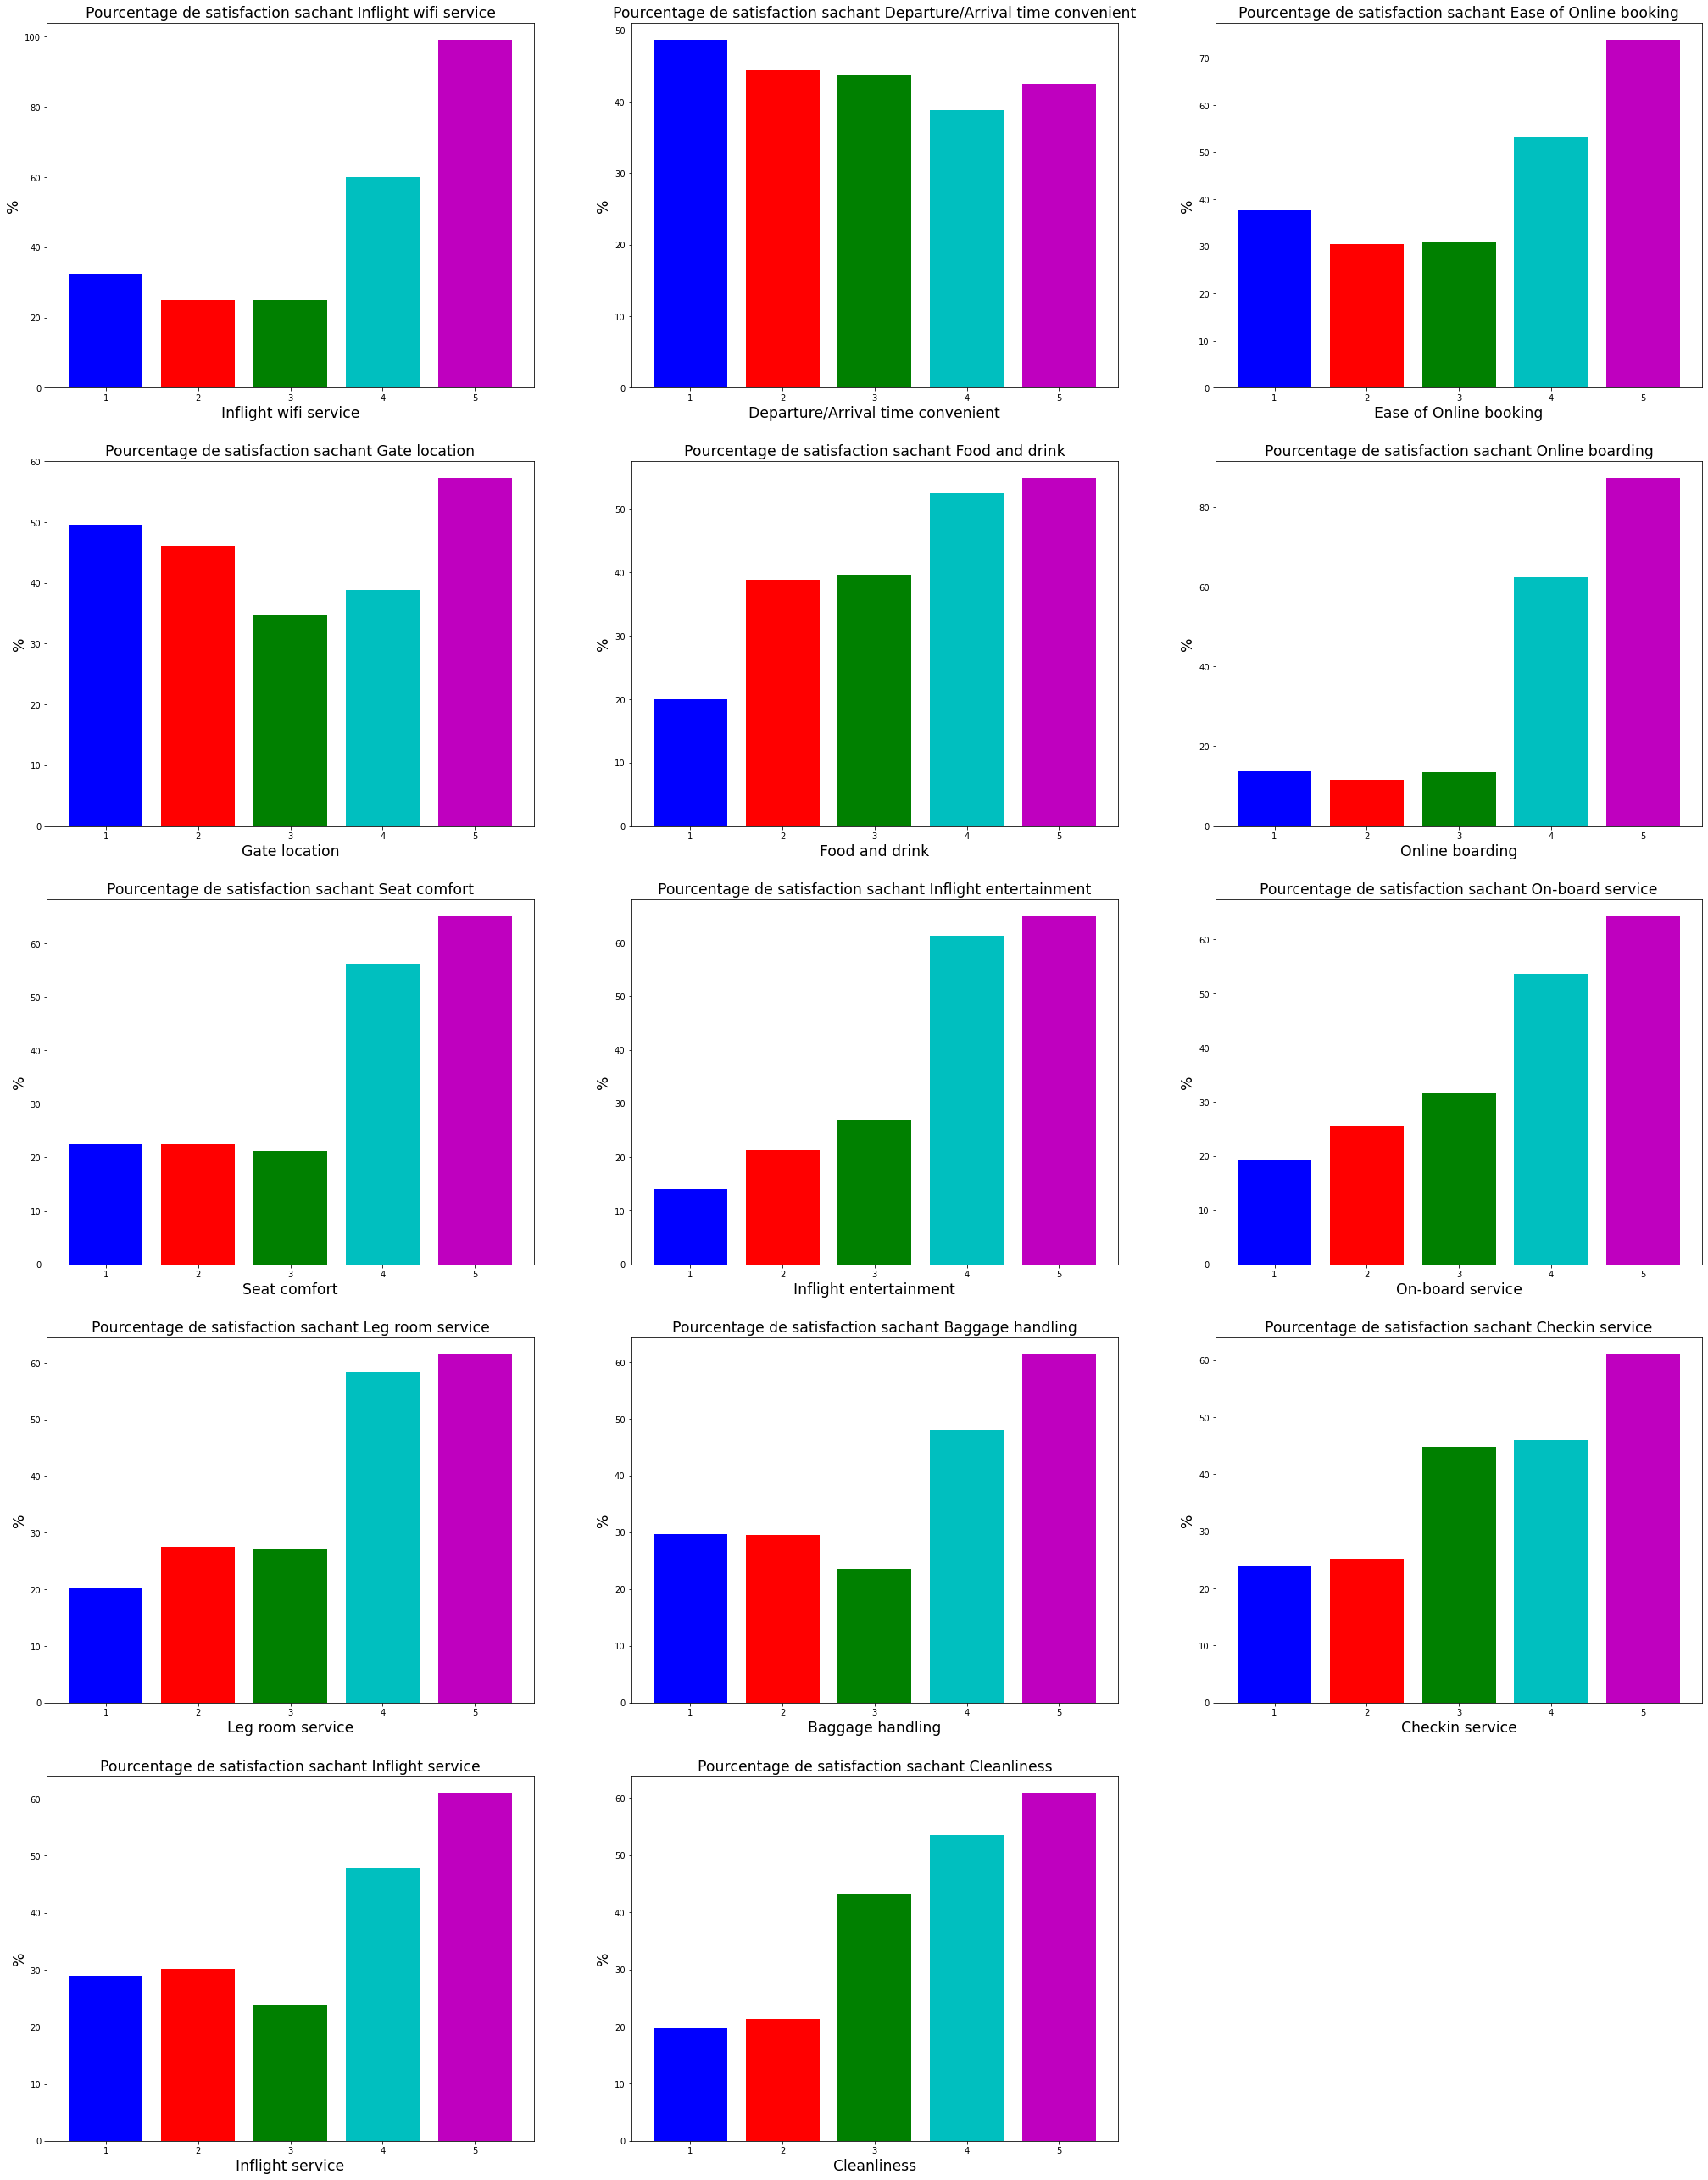

In [24]:
plt.figure(figsize=(35, 65))
rows=0
cols=0
count=0

## On récupère les pourcentages de satisfaction sachant chaque variable
for col in categories:
    x=[]
    percentage = []
    i=1
    count+=1
    
    while(i<6):
        x.append(i)
    
        nbc=sum((train2[col]==i)&(train2["satisfaction"]=="satisfied"))
        nb=sum(train2[col]==i)
        
        if(nb==0):
            percentage.append(0)
        else:
            percentage.append(nbc/nb*100)
            
        i+=1
    
    title='Pourcentage de satisfaction sachant ' + col
    
    plt.subplot(7, 3, count)
    plt.bar(x, percentage, color=['b', 'r', 'g', 'c', 'm'])
    plt.title(title, fontsize='xx-large')
    plt.ylabel('%', fontsize='xx-large')
    plt.xlabel(col, fontsize='xx-large')
    
    cols+=1
    if cols==3:
        cols=0
        rows+=1

<ul>
    <li>Pour tous les features, à l'exception de "Gate Location" et "Departure/Arrival Time convenient", de meilleures notes impliquent une meilleure satisfaction des clients.</li>
    <li>Curieusement, une très bonne note pour "Inflight wifi service" garantit presque sûrement la satisfaction d'un individu (99%). On retrouve dans une moindre mesure ce comportement avec "Ease of Online Booking" et "Online boarding". De la même façon, une mauvaise note à "Online boarding" et "Inflight entertainment" garantit avec une forte probabilité la non satisfaction ou la neutralité d'un individu.</li>
    <li>A la vue de la constance des probabilités vers 45%, "Departure/Arrival Time convenient" n'a pas l'air de jouer un grand rôle dans l'explication de la satisfaction.</li>
</ul>

**Regardons la corrélation entre nos données :**

In [25]:
## La colonne satisfaction doit se transformer en int pour qu'elle apparaisse dans la heatmap
train.loc[train.satisfaction == "satisfied", "satisfaction"] = 1
train.loc[train.satisfaction == "neutral or dissatisfied", "satisfaction"] = 0
train["satisfaction"] = train["satisfaction"].astype('int64')
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [26]:
test.loc[test.satisfaction == "satisfied", "satisfaction"] = 1
test.loc[test.satisfaction == "neutral or dissatisfied", "satisfaction"] = 0
test["satisfaction"] = test["satisfaction"].astype('int64')

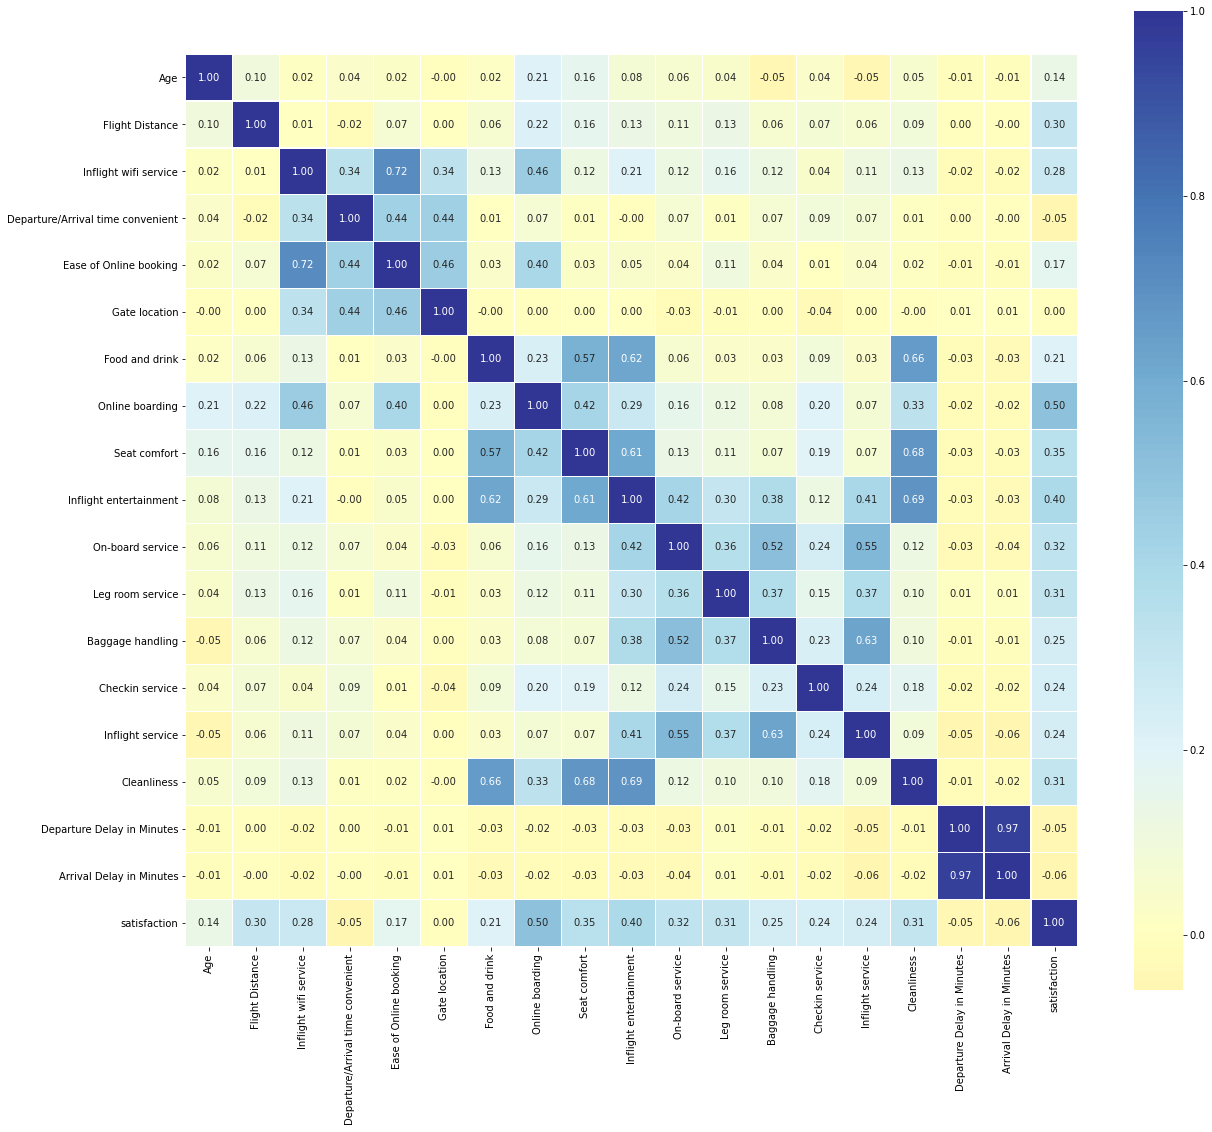

In [27]:
corr = train.corr()

f, ax = plt.subplots(figsize=(20,18))

sns.heatmap(corr, annot=True, cmap="RdYlBu", center=0, square=True, linewidths=.05, fmt = ".2f")

plt.show()

<ul>
    <li>On observe qu'il n'y a pas de corrélation entre la satisfaction des clients et les features "Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes",	"Arrival Delay in Minutes". On va les enlever. Malgré tout, la satisfaction reste corrélée à beaucoup de features.</li>
    <li>Il est clair que la corrélation entre "Departure Delay in Minutes" et "Arrival Delay in Minutes" devrait être égale à 1, mais on observe sur le tableau de corrélation la valeur 0,97, probablement due à des erreurs d'arrondies.</li>
    <li>Il est fort possible que les corrélations ne soient pas linéaire, mais pour faciliter les choses on supposera qu'elles le sont.</li>
</ul>

In [28]:
train.drop(["Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1, inplace=True)
test.drop(["Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1, inplace=True)
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,1


In [29]:
print(train.shape)
test.shape

(103594, 19)


(25893, 19)

<ul>
    <li>Maintenant que nous avons exploré les données, on peut maintenant passer au preprocessing.</li>
</ul>

# Preprocessing

In [30]:
#Importing required libraries for preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#### Binarisation
- Binarisation des features

In [31]:
label_to_encode = ["Gender", "Customer Type", "Type of Travel", "Class"]

label_encoder = preprocessing.LabelEncoder()

for label in label_to_encode :
    train[label] = label_encoder.fit_transform(train[label])
    test[label] = label_encoder.fit_transform(test[label])

In [32]:
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,0,13,1,2,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,1,1,25,0,0,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,26,0,0,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,0,25,0,0,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,1,0,61,0,0,214,3,3,4,5,5,3,3,4,4,3,3,3,1
5,0,0,26,1,1,1180,3,2,1,2,1,1,3,4,4,4,4,1,0
6,1,0,47,1,1,1276,2,2,2,2,2,2,3,3,4,3,5,2,0
7,0,0,52,0,0,2035,4,4,5,5,5,5,5,5,5,4,5,4,1
8,0,0,41,0,0,853,1,2,4,3,3,1,1,2,1,4,1,2,0
9,1,1,20,0,1,1061,3,3,2,3,3,2,2,3,4,4,3,2,0


In [33]:
test.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,52,0,1,160,5,3,3,4,3,5,5,5,5,2,5,5,1
1,0,0,36,0,0,2863,1,3,5,4,5,4,4,4,4,3,4,5,1
2,1,1,20,0,1,192,2,2,2,2,2,2,4,1,3,2,2,2,0
3,1,0,44,0,0,3377,0,0,3,4,4,1,1,1,1,3,1,4,1
4,0,0,49,0,1,1182,2,4,4,1,2,2,2,2,2,4,2,4,1


#### Création des train/test set

In [34]:
X = train.drop("satisfaction", axis=1)
y = train["satisfaction"]

X_test = test.drop("satisfaction", axis=1)
y_test = test["satisfaction"]

- Séparation du train set création d'un validation set (80-20)

In [35]:
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
X_train.shape

(82875, 18)

# Model selection

<ul>
    <li>Pour la sélection du model, nous allons entrainer un DecisionTree et un RandomForest vu la dimensionnalité de nos données</li>
    <li>Nous allons ensuite comparé le score de chacun de ces modeles pour ensuite déduire lequel sera le plus performant</li>
</ul>

In [36]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import time

In [37]:
MAX_DEPTH = 5
MAX_FEATURES = X.shape[1]
clf = tree.DecisionTreeClassifier(max_depth=MAX_DEPTH, max_features=MAX_FEATURES)
clf = clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print("L'accuracy du modèle est: ", accuracy)

L'accuracy du modèle est:  0.9085863217336744


<ul>
    <li>Les hyperparamètre de ce modele ont été choisi aléatoirement, et nous avons obtenu un score de 90% ce qui n'est pas mal</li>
    <li> Une petite visualisation du procéder (https://mljar.com/blog/visualize-decision-tree/)</li>
</ul>

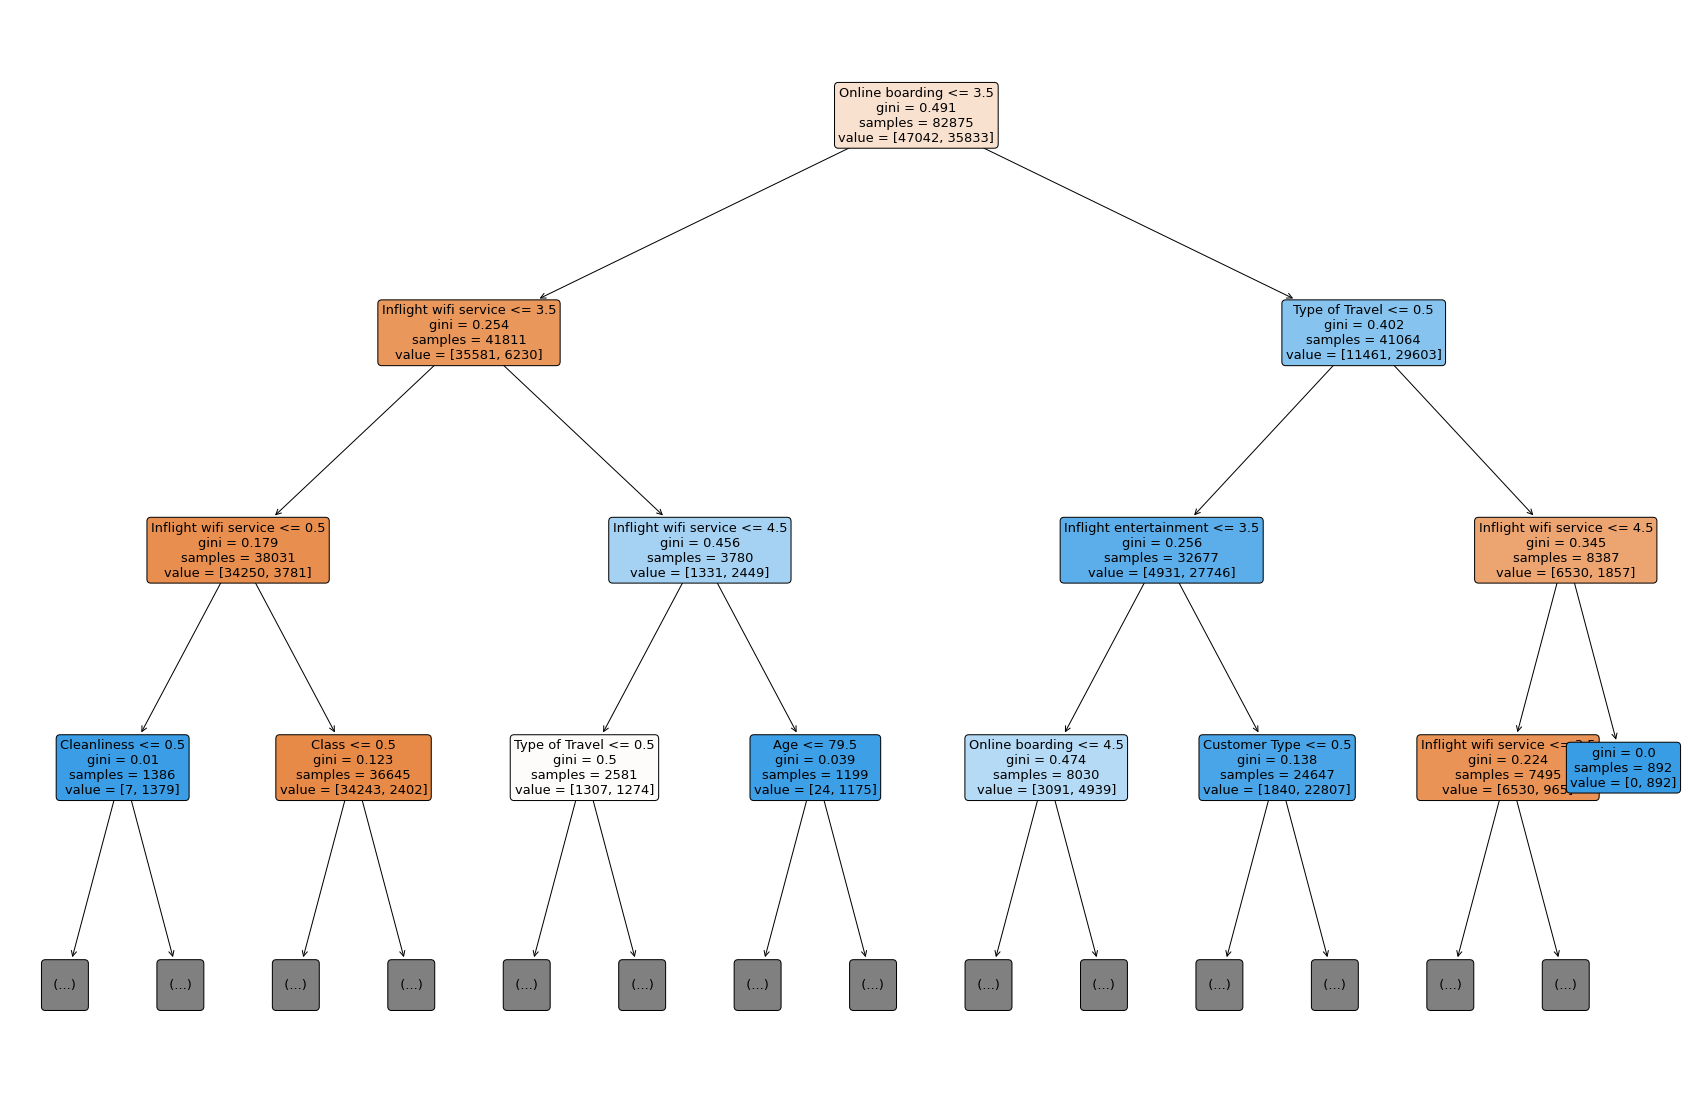

In [38]:
from IPython.display import Image

fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(clf, feature_names=X_train.columns, fontsize=13, max_depth=3, rounded = True,filled=True)

fig.savefig("decision_tree.png")

## Optimisation

- Il est temps d'optimiser notre modele en choisissant les meilleurs possibles hyperparamètre sans que les calculs prennent trop de temps, nous chercherons à optimiser notre modèle pour pour obtenir en meilleur score(accuracy)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
#Les hyperparametre que nous voulons modifier
param_dict = {"criterion" : ['gini', 'entropy'], "max_depth" : range(1, 20), "min_samples_leaf" : range(1, 10)}

In [41]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param_dict, cv = 10, verbose=2, n_jobs=-1)

In [42]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 342 candidates, totalling 3420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3420 out of 3420 | elapsed:  3.7min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10)},
             verbose=2)

In [43]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4}

In [44]:
crit = 'entropy'
MAX_DEPTH = 16
MIN_SAMPLES_LEAF = 4
print("L'accuracy du modèle est : ", grid.best_score_)

L'accuracy du modèle est :  0.9514088258322448


In [45]:
#On prend le meilleur modele possible 
best_model_DTC = grid.best_estimator_

In [46]:
#On regarde son score sur les données test
accuracy = best_model_DTC.score(X_test, y_test)
print("L'accuracy du modèle est : ", accuracy)

L'accuracy du modèle est :  0.9523423319043757


### Visualisation

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [51]:
confusion_matrix(y_test, best_model_DTC.predict(X_test))

array([[14081,   447],
       [  787, 10578]])

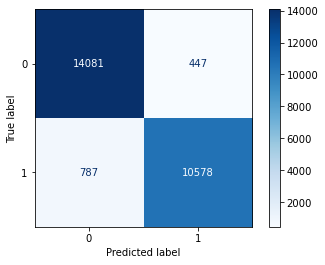

In [52]:
fig = plot_confusion_matrix(best_model_DTC, X_test, y_test, cmap="Blues")

- Peut-on obtenir un meilleur score si on avait plus de données ?

In [53]:
from sklearn.model_selection import learning_curve

In [54]:
N, train_score, val_score = learning_curve(best_model_DTC, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10)

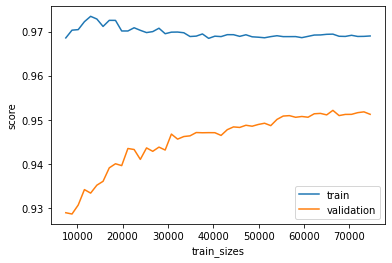

In [55]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.legend()

- La métrique de score est l'accuracy.
- Validation score a l'air de continuer à augmenter, peut-être qu'avec plus de données on obtiendra un meilleur score

### ROC et AUC

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve
proba_DTC = best_model_DTC.predict_proba(X_test)[:, 1]

auc_DTC = roc_auc_score(y_test, proba_DTC)
print('Decision Tree Classifier ROC AUC = %.6f' % (auc_DTC))

Decision Tree Classifier ROC AUC = 0.979299


### RandomForest

- Nous avons que nous pouvons obtenir un score de ~95% avec un DecisionTreeClassifier
- Regardons si un RandomForestClassifier nous permettra d'obtenir un meilleur score

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
#On a repris les meilleurs hyperparametre du DecisionTreeClassifier car un RandomForestClassifier est composé de plusiseurs DecisionTree
clf = RandomForestClassifier(criterion = crit, max_depth=MAX_DEPTH, max_features=MAX_FEATURES, min_samples_leaf = MIN_SAMPLES_LEAF, random_state=6)
clf.fit(X_train, y_train)
accuracy = clf.score(X_val, y_val)
print("L'accuracy du modèle est: ", accuracy)

L'accuracy du modèle est:  0.9618707466576573


- Aucun moyen de visualiser (A ma connaissance)

## Optimisation 
- L'optimisation d'un RandomForestClassifier sera nettement plus longue que celle d'un DecisionTreeClassifier
- Surtout qu'on cherchera a modifier encore plus d'hyperparametres

In [59]:
space = np.logspace(1,3, num=11, dtype='int')
space

array([  10,   15,   25,   39,   63,  100,  158,  251,  398,  630, 1000])

In [60]:
param_dict = {'n_estimators' : space}

In [61]:
grid = GridSearchCV(RandomForestClassifier(criterion=crit, max_depth=MAX_DEPTH, max_features=MAX_FEATURES, 
                                           min_samples_leaf=MIN_SAMPLES_LEAF), 
                                           param_grid = param_dict, cv = 10, verbose=2, n_jobs=-1)

In [62]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed: 19.6min finished


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=16,
                                              max_features=18,
                                              min_samples_leaf=4),
             n_jobs=-1,
             param_grid={'n_estimators': array([  10,   15,   25,   39,   63,  100,  158,  251,  398,  630, 1000])},
             verbose=2)

In [63]:
grid.best_params_

{'n_estimators': 251}

In [64]:
print("L'accuracy du modèle est: ", grid.best_score_)

L'accuracy du modèle est:  0.96071198673505


In [65]:
best_model_RFC = grid.best_estimator_
accuracy = best_model_RFC.score(X_test, y_test)
print("L'accuracy du modèle est: ", accuracy)

L'accuracy du modèle est:  0.9602595296025953


### Visualisation

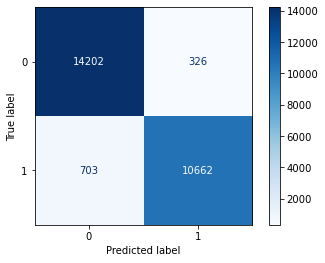

In [66]:
confusion_matrix(y_test, best_model_RFC.predict(X_test))
fig = plot_confusion_matrix(best_model_RFC, X_test, y_test, cmap="Blues")

In [67]:
N, train_score, val_score = learning_curve(best_model_RFC, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 25), cv=5)

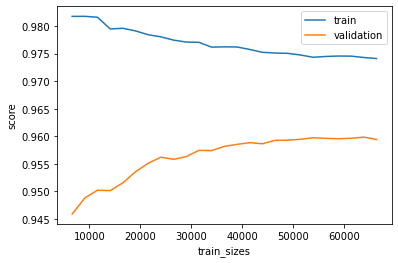

In [68]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.legend()

- Validation score stable ?

- On peut regarder l'importance des features (https://www.datacamp.com/community/tutorials/random-forests-classifier-python#comparison)

In [69]:
feature_imp = pd.Series(best_model_RFC.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

Online boarding           0.330477
Inflight wifi service     0.205764
Type of Travel            0.140904
Customer Type             0.053364
Class                     0.044339
Inflight entertainment    0.042951
Checkin service           0.028699
Baggage handling          0.024042
Age                       0.020560
On-board service          0.020399
Seat comfort              0.018171
Flight Distance           0.017345
Inflight service          0.016906
Cleanliness               0.013131
Leg room service          0.009514
Ease of Online booking    0.008816
Food and drink            0.003060
Gender                    0.001556
dtype: float64

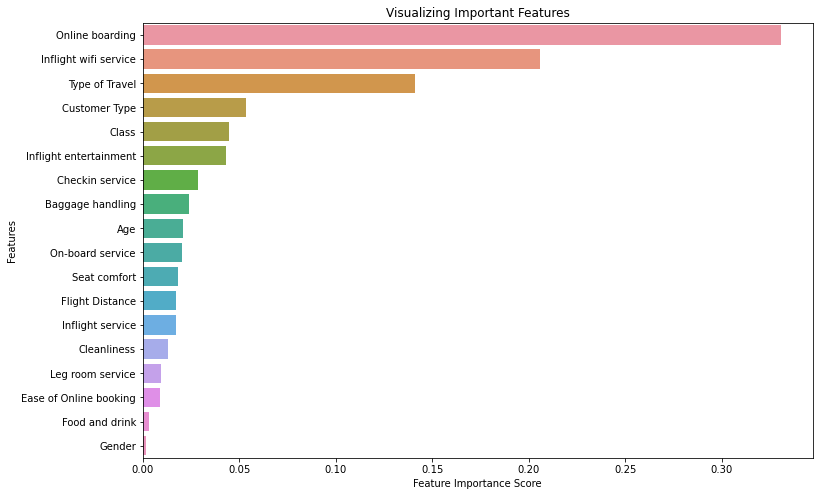

In [70]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

- On remarque que le feature Gender n'est pas important (normal ?)
- On aurait pensé que le feature Cleanliness aurait une plus grand importance et que Age aurait eu une plus petite importance

### Coube ROC et AUC
- On à présent comparer les courbes ROC et AUC de nos deux modèles (https://python-bloggers.com/2020/12/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time/)

In [71]:
proba = best_model_RFC.predict_proba(X_test)
proba = proba[:,1]
auc=roc_auc_score(y_test, proba)
print('Random Forest Classifier: ROC AUC=%.6f' % (auc))

Random Forest Classifier: ROC AUC=0.993731


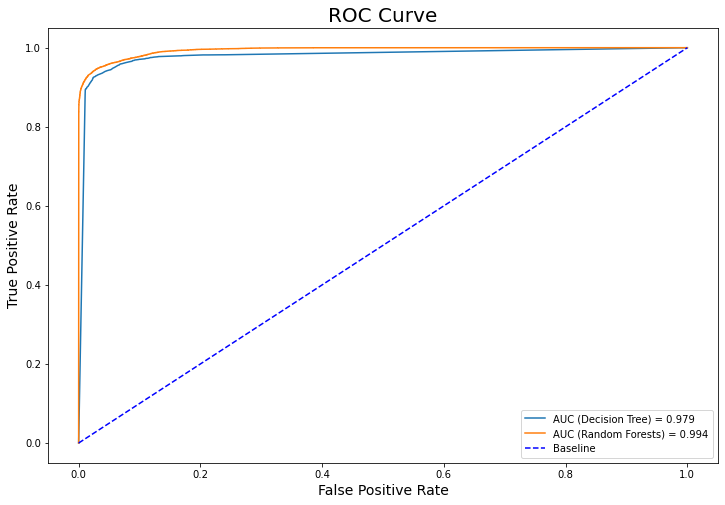

In [72]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(12,8))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, proba_DTC)
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, proba)

plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_DTC:.3f}')
plt.plot(fpr_RFC, tpr_RFC, label=f'AUC (Random Forests) = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

- Le modèle RandomForestClassifier est meilleur que le DecisionTreeClassifier ce qui est prévisible, car celui-ci est composé d'une multitude de DecisionTreeClassifier